# Detection of Chessboard

## imports

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
!pip3 install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 614.2/614.2 kB 6.8 MB/s eta 0:00:00


## Predicting from trained model

In [ ]:
from ultralytics import YOLO
model_trained = YOLO("chess_board_best.pt")
image = "image.png"
results = model_trained.predict(source=image)
print(results)


image 1/1 /content/image.png: 608x640 1 brd, 85.7ms
Speed: 15.8ms preprocess, 85.7ms inference, 36.1ms postprocess per image at shape (1, 3, 608, 640)


[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'brd'}
orig_img: array([[[145, 145, 145],
        [151, 151, 151],
        [155, 155, 155],
        ...,
        [156, 156, 156],
        [155, 155, 155],
        [156, 156, 156]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [ 42,  42,  42],
        ...,
        [ 47,  47,  47],
        [ 45,  45,  45],
        [ 49,  49,  49]],

       ...,

       [[  0,   0,   0],
        [ 37,  37,  37],
        [ 61,  61,  61],
        ...,
        [ 60,  60,  60],
        [ 75,  75,  75],
        [ 85,  85,  85]],

       [[  0,   0,   0],
        [ 36,  36,  36],
        [ 62,  62,  62],
        ...,
        [ 69,  69,  69],
        [ 79,  79,  79],
        [ 85,  85,  85]],

In [ ]:
for result in results:
    # detection
    print(result.boxes.xyxy)   # box with xyxy format, (N, 4)
    print(result.boxes.xywh)   # box with xywh format, (N, 4)
    print(result.boxes.xyxyn)  # box with xyxy format but normalized, (N, 4)
    print(result.boxes.xywhn)  # box with xywh format but normalized, (N, 4)
    print(result.boxes.conf)   # confidence score, (N, 1)
    print(result.boxes.cls)    # cls, (N, 1)


tensor([[  7.3702,  16.6973, 790.1980, 735.4301]], device='cuda:0')
tensor([[398.7841, 376.0637, 782.8278, 718.7328]], device='cuda:0')
tensor([[0.0093, 0.0224, 0.9977, 0.9885]], device='cuda:0')
tensor([[0.5035, 0.5055, 0.9884, 0.9660]], device='cuda:0')
tensor([0.9666], device='cuda:0')
tensor([0.], device='cuda:0')


In [ ]:
bb = result.boxes.xyxy.tolist()[0]
bb

[7.370240211486816, 16.697263717651367, 790.197998046875, 735.4301147460938]

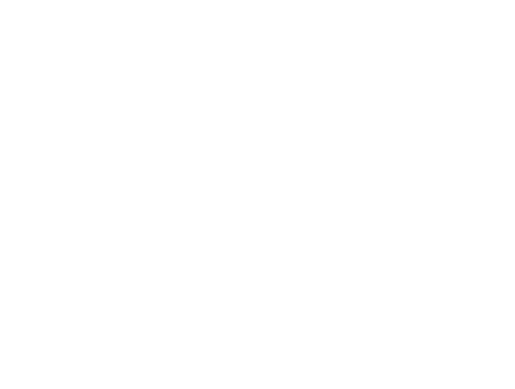

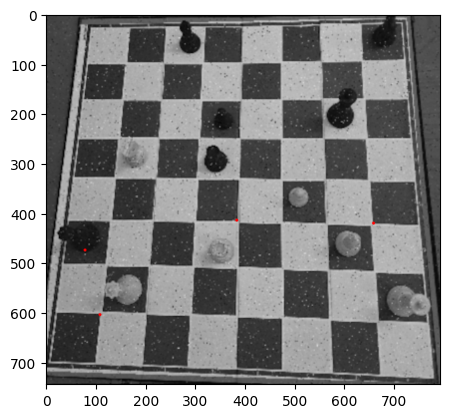

(<matplotlib.image.AxesImage at 0x7c22b8789510>, None)

In [ ]:
import cv2
import numpy as np

# Load the image
image = cv2.imread("image.png")

# Define the coordinates of the bounding box (x_min, y_min, x_max, y_max)
x_min, y_min, x_max, y_max = bb

# Crop the image using the bounding box coordinates
cropped_image = image[int(y_min):int(y_max), int(x_min):int(x_max)]

# Display the cropped image using plt
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.axis('off')  # Turn off axis labels and ticks
plt.show()
corners = cv2.goodFeaturesToTrack(gray, 4, 0.5, 10)
corners = np.int0(corners)
for i in corners:
    x, y = i.ravel()
    cv2.circle(image, (x, y), 3, 255, -1)

plt.imshow(image), plt.show()

## Detecting edges and vertices

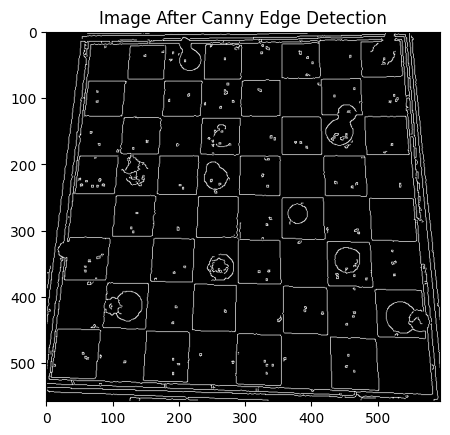

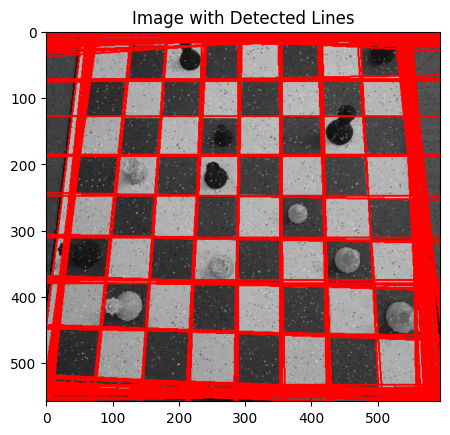

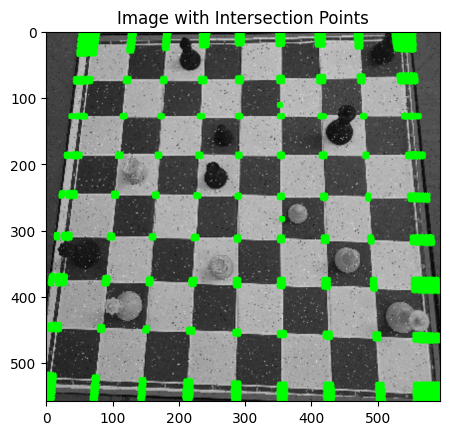

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load your chessboard image
image = cv2.imread('cropped_image.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply Canny edge detection
edges = cv2.Canny(blurred, 50, 150)

# Print the image after Canny edge detection
plt.imshow(edges, cmap='gray')
plt.title('Image After Canny Edge Detection')
plt.show()

# Find lines using Hough Line Transform
lines = cv2.HoughLines(edges, 1, np.pi / 180, threshold=100)

# Create a copy of the original image for visualization
image_with_lines = image.copy()

# Draw detected lines on the image
if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(image_with_lines, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Print the image with detected lines
plt.imshow(cv2.cvtColor(image_with_lines, cv2.COLOR_BGR2RGB))
plt.title('Image with Detected Lines')
plt.show()

# Use the lines to find the intersections (81 points)
intersections = []
if lines is not None:
    for i in range(len(lines)):
        for j in range(i + 1, len(lines)):
            rho1, theta1 = lines[i][0]
            rho2, theta2 = lines[j][0]

            # Check if lines are nearly parallel
            if np.abs(theta1 - theta2) < np.radians(10):
                continue

            A = np.array([
                [np.cos(theta1), np.sin(theta1)],
                [np.cos(theta2), np.sin(theta2)]
            ])
            b = np.array([rho1, rho2])

            try:
                intersection = np.linalg.solve(A, b)
                x, y = map(int, intersection)
                intersections.append((x, y))
            except np.linalg.LinAlgError:
                # Singular matrix, lines are nearly parallel
                pass

# Print the image with intersection points
image_with_intersections = image.copy()
for point in intersections:
    cv2.circle(image_with_intersections, point, 5, (0, 255, 0), -1)

plt.imshow(cv2.cvtColor(image_with_intersections, cv2.COLOR_BGR2RGB))
plt.title('Image with Intersection Points')
plt.show()


## Perspective Transform and creating squares

In [ ]:
import cv2
import matplotlib.pyplot as plt

# define a function to display the coordinates of

# of the points clicked on the image
def click_event(event, x, y, flags, params):
   if event == cv2.EVENT_LBUTTONDOWN:
      print(f'({x},{y})')

      # put coordinates as text on the image
      cv2.putText(img, f'({x},{y})',(x,y),
      cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

      # draw point on the image
      cv2.circle(img, (x,y), 3, (0,255,255), -1)

# read the input image
img = cv2.imread('back2school.jpg')

# create a window
cv2.namedWindow('Point Coordinates')

# bind the callback function to window
cv2.setMouseCallback('Point Coordinates', click_event)

# display the image
plt.plot('Point Coordinates',img)


cv2.destroyAllWindows()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#  Prediction of chessPieces

In [ ]:
import matplotlib.pyplot as plt
from ultralytics import YOLO
model_trained = YOLO("/content/drive/MyDrive/Colab Notebooks/chess_pieces_model_best.pt")
image = "/content/IMG_20200912_235349.jpg"
results = model_trained.predict(source=image, save = True)
print(results)


image 1/1 /content/IMG_20200912_235349.jpg: 320x640 5 BPs, 8 WPs, 11.3ms
Speed: 2.3ms preprocess, 11.3ms inference, 1.3ms postprocess per image at shape (1, 3, 320, 640)
Results saved to runs/detect/predict7


[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'BB', 1: 'BK', 2: 'BKN', 3: 'BP', 4: 'BQ', 5: 'BR', 6: 'WB', 7: 'WK', 8: 'WKN', 9: 'WP', 10: 'WQ', 11: 'WR'}
orig_img: array([[[145, 152, 155],
        [146, 153, 156],
        [148, 155, 158],
        ...,
        [140, 152, 154],
        [140, 152, 154],
        [141, 153, 155]],

       [[147, 154, 157],
        [150, 157, 160],
        [152, 159, 162],
        ...,
        [138, 150, 152],
        [134, 146, 148],
        [133, 145, 147]],

       [[151, 158, 161],
        [152, 159, 162],
        [154, 161, 164],
        ...,
        [140, 152, 154],
        [138, 150, 152],
        [140, 152, 154]],

       ...,

       [[158, 170, 172],
        [158, 170, 172],
        [155, 167, 169],
        ...,
        [132, 138, 143],
        [131, 137, 142],
        [132, 138, 143]],

       [[156, 168, 170],
        [157, 169, 171],
        [15

## Predicting from pieces trained model

## Transforming pieces on squares into chess notation